# Regression Performance

In [1]:
import tensorflow as tf
import os
from tqdm import tqdm
cwd = os.getcwd()
os.chdir('../../src/')
from dataloader import OneHotEncoder, load_fasta_data, RNASeqDataGenerator
from regression import seq2twohot
os.chdir('../experiments/RegressionPredictivePower/')

In [2]:
be_type='ABE'
sample='244C'
be_class='miniABEmax'

data_dir = "../../data/raw/{0}/{0}-sequence/".format(be_type)
test_chr = [str(x) for x in range(20, 23)] +['X']
test_seqs, test_ers = [], []
for rep in test_chr:
        seq, er = load_fasta_data(sample, rep, data_dir)
        test_seqs = seq+test_seqs
        test_ers = er+test_ers

In [3]:
import numpy as np
test_seq_reg = np.array([seq2twohot(x) for x in tqdm(test_seqs)])

100%|██████████| 358706/358706 [00:05<00:00, 63968.89it/s]


In [4]:
with open('../../models/regression/{}/{}.npy'.format(be_type, sample), 'rb') as f:
    coef = np.load(f)
    intercept = np.load(f)

In [5]:
preds = np.matmul(test_seq_reg, coef)+intercept

In [6]:
test_ers+=np.exp(-8)
preds+=np.exp(-8)

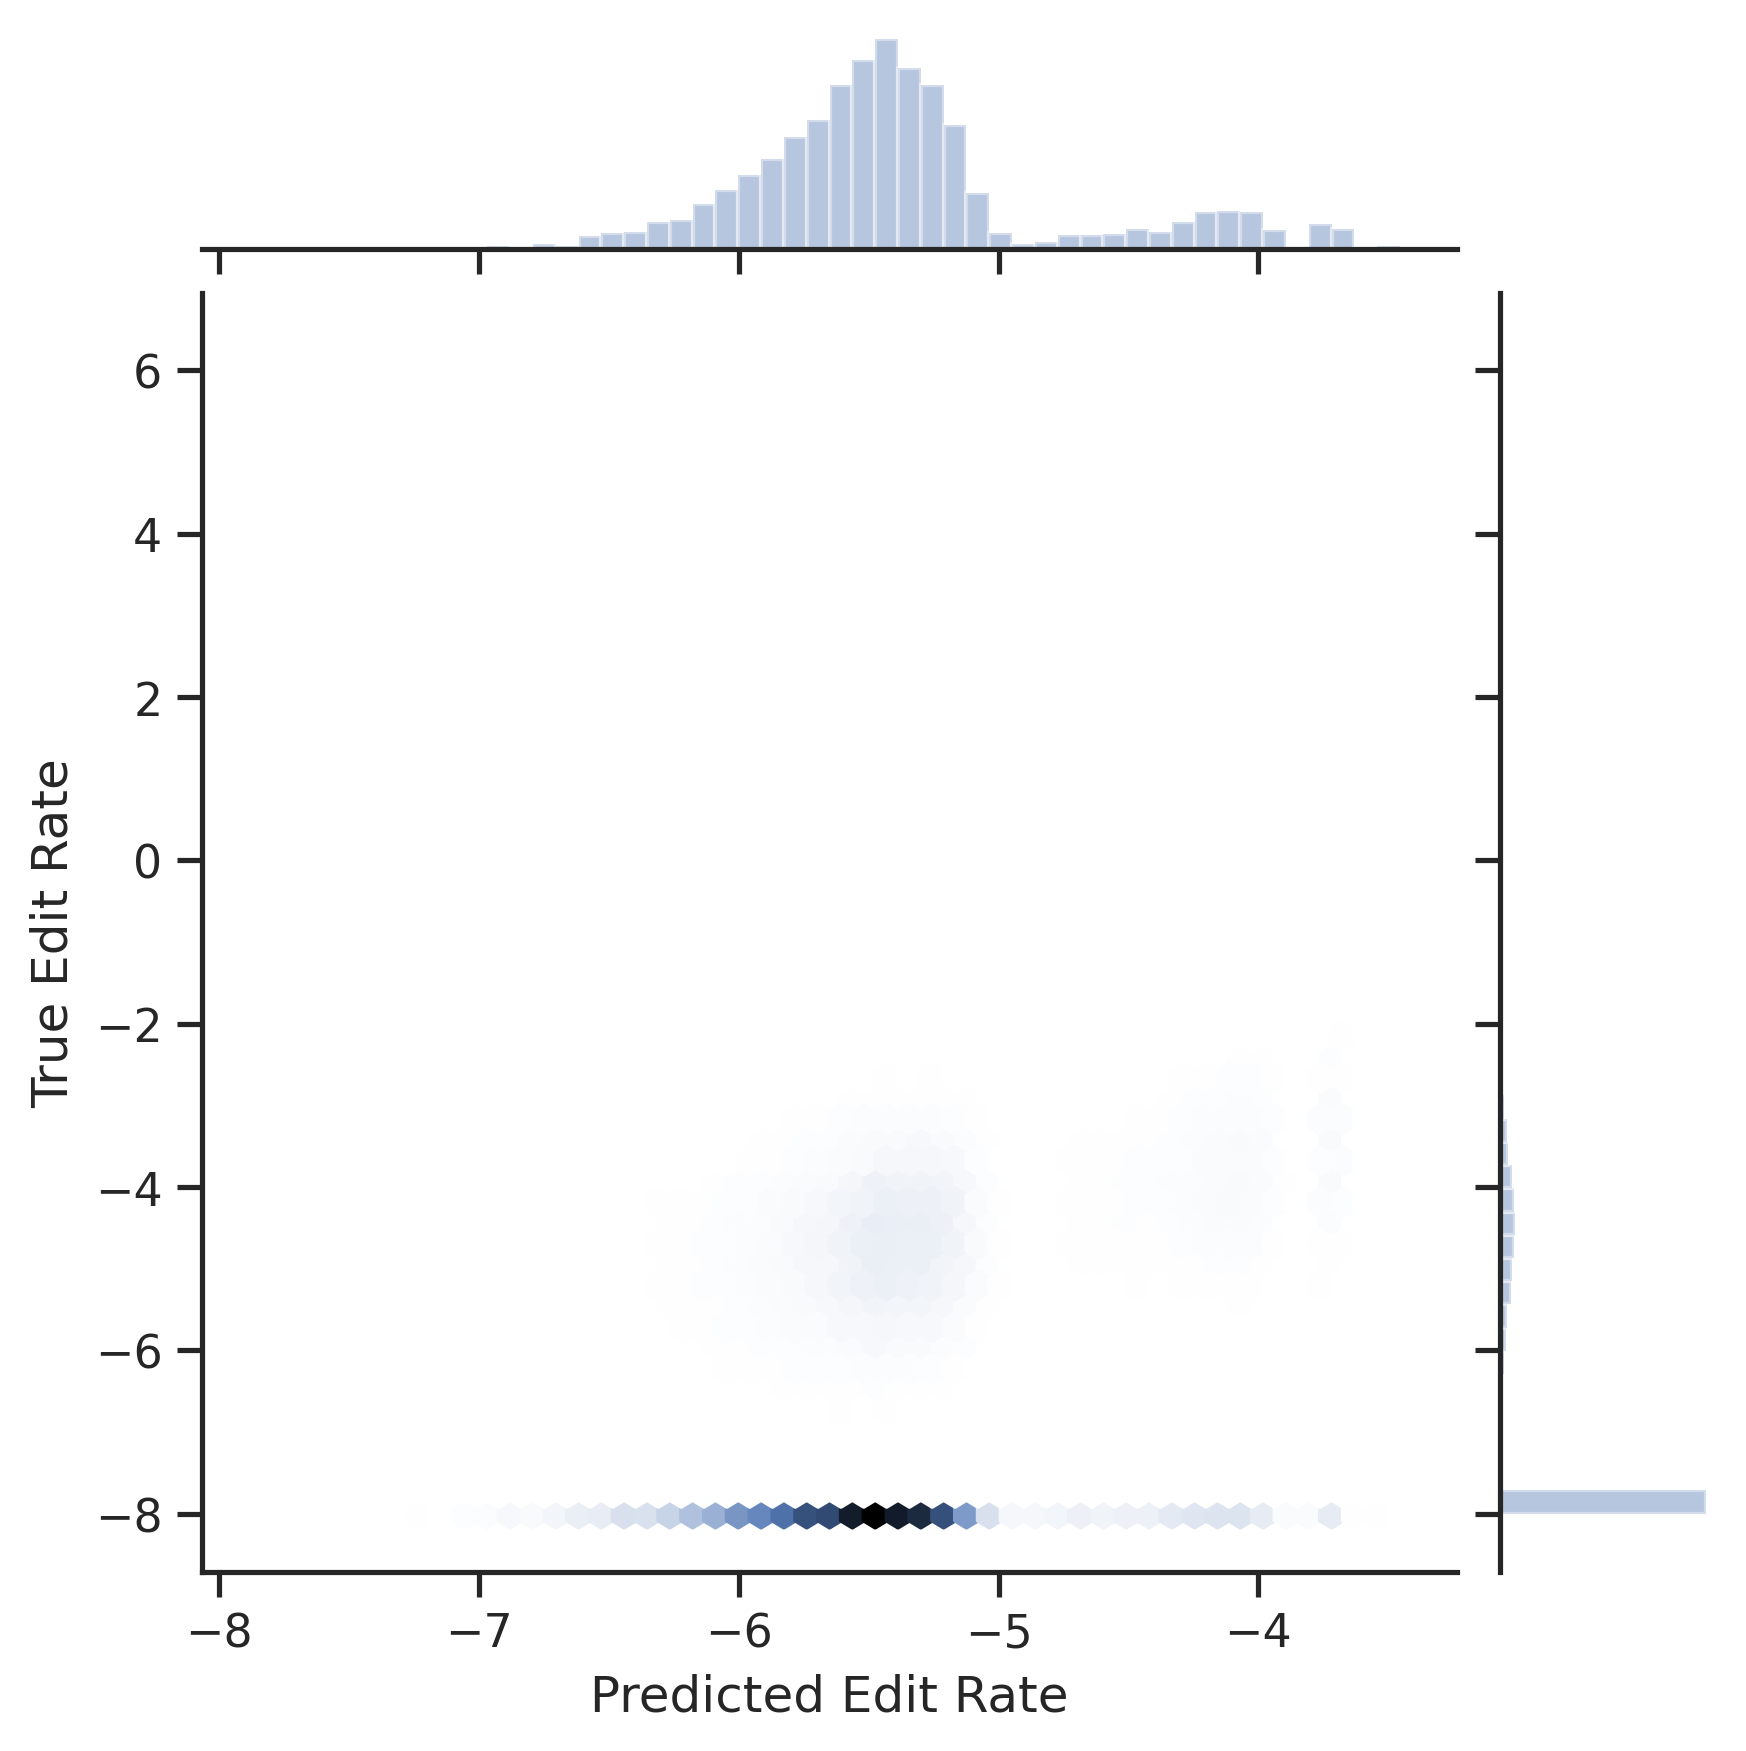

In [7]:
import seaborn as sns
from scipy.special import logit
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

import pandas as pd
df = pd.DataFrame(data={'Predicted Edit Rate':logit(preds), 'True Edit Rate': logit(test_ers)})

sns.jointplot(data=df, x="Predicted Edit Rate", y="True Edit Rate", kind="hex")

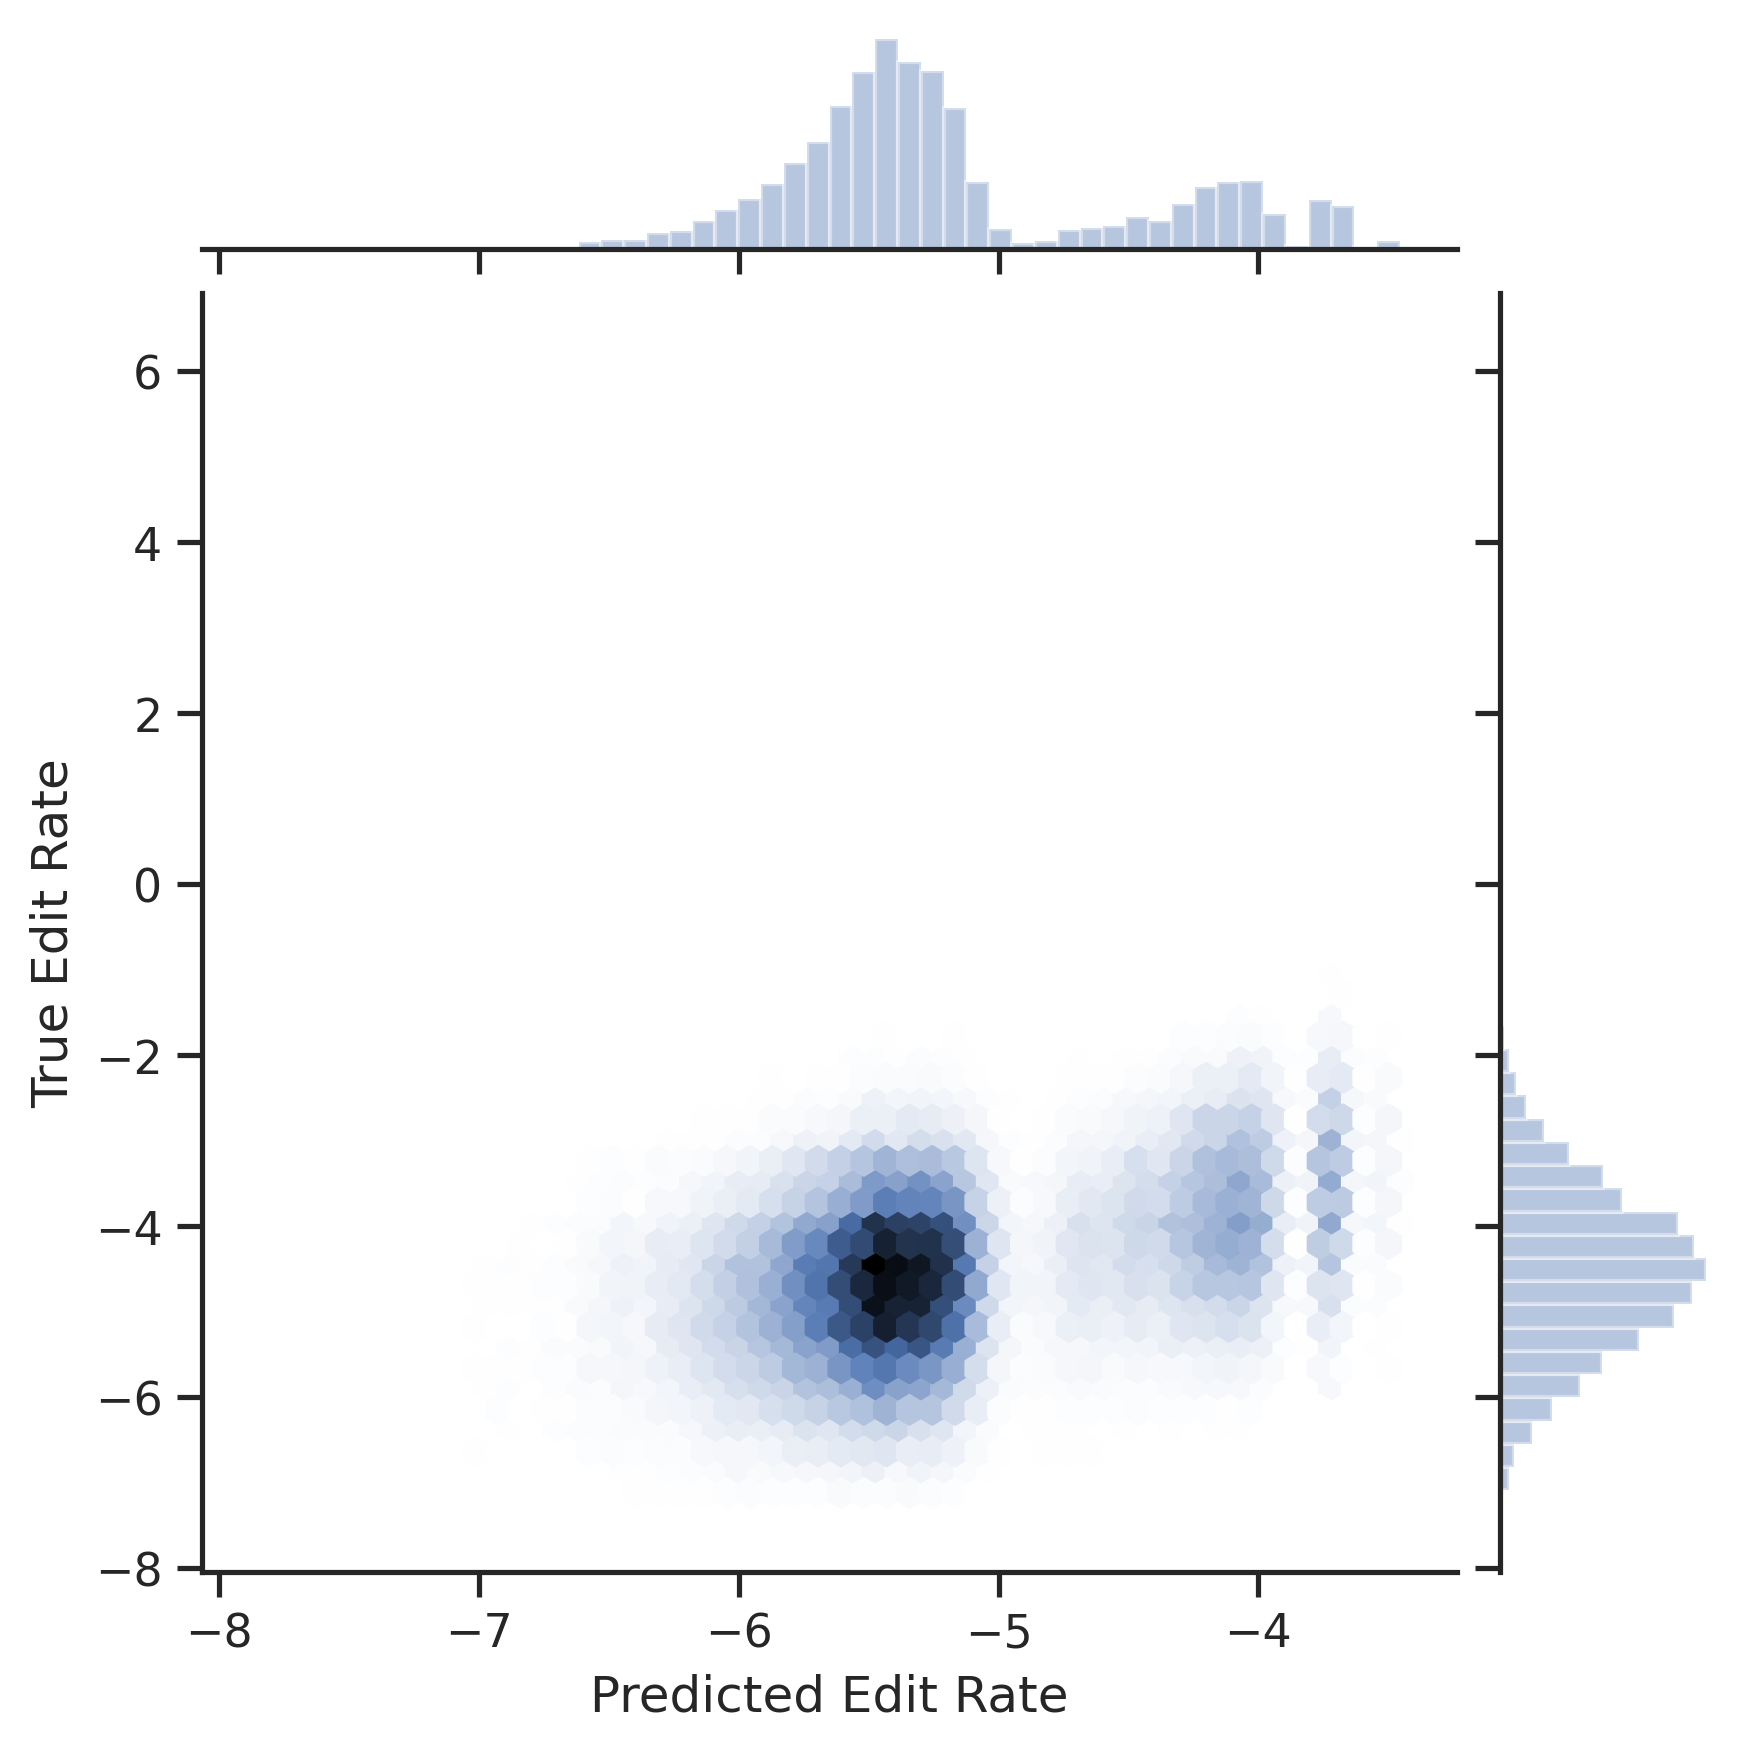

In [8]:
import pandas as pd
df = df[df['True Edit Rate']>-7.5]
plt = sns.jointplot(data=df, x="Predicted Edit Rate", y="True Edit Rate", kind="hex")
plt.savefig('{}/{}Logit.svg'.format(be_class, sample))
plt.savefig('{}/{}Logit.png'.format(be_class, sample))

In [9]:
import scipy
scipy.stats.pearsonr(preds, test_ers)

(0.32864974682412196, 0.0)

In [10]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(test_ers, preds))

0.01564631361561847
